# Diabetes Prediction


 Data Link : https://www.kaggle.com/johndasilva/diabetes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
######################################################

from sklearn.impute import SimpleImputer
from sklearn.model_selection import ShuffleSplit
from  sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , f1_score ,accuracy_score

######################################################
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

### Data Exploration and preparation

In [2]:
current_dir=os.getcwd()
path=os.path.join(current_dir , "..", "Dataset", "kaggle_diabetes.csv")

In [3]:
data=pd.read_csv(path)

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [5]:
data.shape , data.info() , data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


((2000, 9),
 None,
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

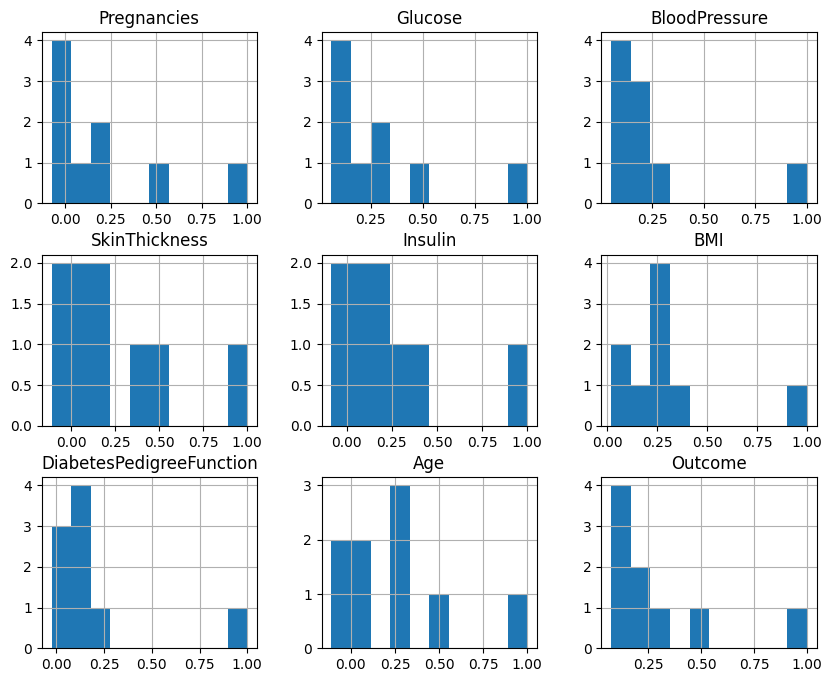

In [101]:
corr=data.corr()
corr.hist(figsize=(10,8))

In [7]:
corr["Outcome"].sort_values(ascending=False)

NameError: name 'corr' is not defined

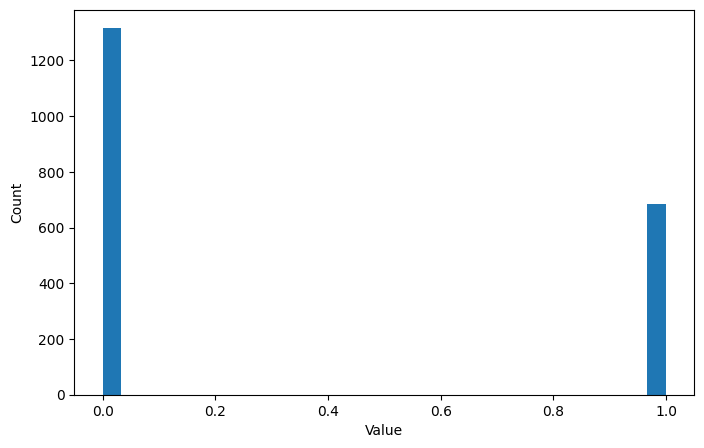

In [8]:
plt.figure(figsize=(8,5))
plt.hist(data["Outcome"], bins=30)
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

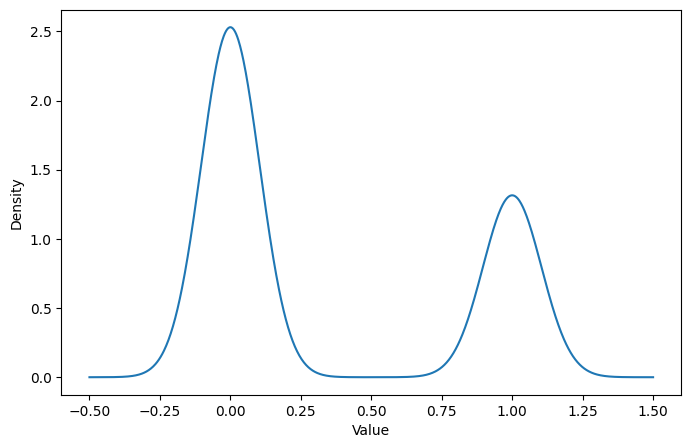

In [9]:
plt.figure(figsize=(8,5))
data["Outcome"].plot(kind="density")
plt.xlabel("Value")
plt.show()

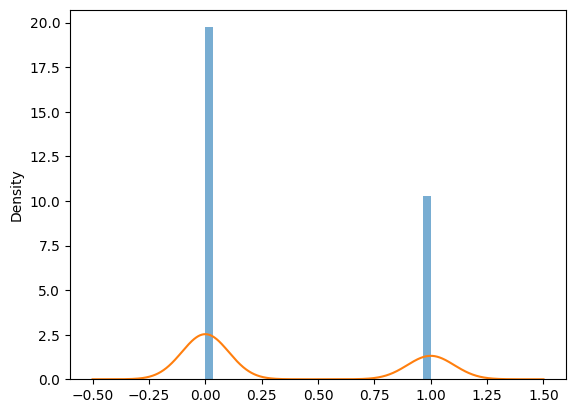

In [10]:
plt.hist(data["Outcome"], bins=30, density=True, alpha=0.6)
data["Outcome"].plot(kind="density")
plt.show()

#### Data Cleaning  

In [11]:
data[data==0].count()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

##### These Features cannot be zero.  
- **(Glucose - BloodPressure - SkinThickness - Insulin - BMI)**
- Zero here means Nan      

In [12]:
df=data.copy(deep=True)

In [13]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [14]:
df[df==0].count()

Pregnancies                  301
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [15]:
df.isna().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
imputer=SimpleImputer(strategy='mean')
imputer.fit(df)
df=pd.DataFrame(imputer.transform(df),columns=df.columns)

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

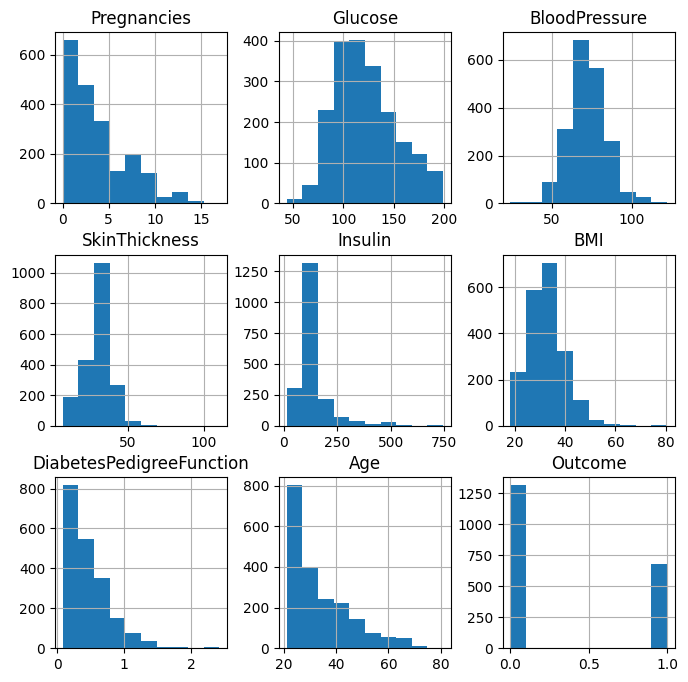

In [18]:
df.hist(figsize=(8,8))

In [19]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1745,1.0,120.0,80.000000,48.000000,200.000000,38.9,1.162,41.0,0.0
802,1.0,180.0,72.403665,29.341275,153.743295,43.3,0.282,41.0,1.0
1977,2.0,99.0,52.000000,15.000000,94.000000,24.6,0.637,21.0,0.0
822,3.0,61.0,82.000000,28.000000,153.743295,34.4,0.243,46.0,0.0
322,0.0,124.0,70.000000,20.000000,153.743295,27.4,0.254,36.0,1.0


In [20]:
df.to_csv("diabetes_data.csv", index=False)

In [21]:
X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)

##### Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [126]:
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "KNN": KNeighborsClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "SVM": SVC()
# }

# for name, model in models.items():
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
#     print(name, ":", scores.mean())

In [127]:
model_params = {

    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },

    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9, 11],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    },

    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4, 8]
        }
    },

    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [30 ,50,100, 300],
            'max_depth': [None, 10, 20, 30, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': ['sqrt', 'log2', 0.5, None],
            'bootstrap': [True, False],
            'class_weight': [None, 'balanced']
        }
    },

    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [2, 3, 5],
            "min_samples_split": [2, 5, 10],
            "subsample":[ 0.9, 0.8, 0.75 , 0.70],
            "min_samples_leaf": [1, 2, 4]
        }
    },

    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    }
}

In [128]:
cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [129]:


results = []

for model_name, mp in model_params.items():
    print("Training:", model_name)

    clf = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        cv=cv_shuffle,
        scoring="f1",
        n_jobs=-1
    )

    clf.fit(X_train, y_train)

    results.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
print("\n=== FINAL RESULTS ===")
for r in results:
    print(f"{r['model']}:")
    print(" Best F1 Score :", r["best_score"])
    print(" Best Params   :", r["best_params"])
    print("-----------------------------")

Training: Logistic Regression
Training: KNN
Training: Decision Tree
Training: Random Forest
Training: Gradient Boosting
Training: SVM

=== FINAL RESULTS ===
Logistic Regression:
 Best F1 Score : 0.6357500201151637
 Best Params   : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
-----------------------------
KNN:
 Best F1 Score : 0.9295867021817955
 Best Params   : {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
-----------------------------
Decision Tree:
 Best F1 Score : 0.9340102074431037
 Best Params   : {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
-----------------------------
Random Forest:
 Best F1 Score : 0.941831991589939
 Best Params   : {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-----------------------------
Gradient Boosting:
 Best F1 Score : 0.9404900415417952
 Best Params   : {'learning_rate': 0.1, 

#### Best Model **Random Forest**  With  F1 Score **0.941831991589939**
###### Best Params {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:


param_grid = {
    'n_estimators': [30 ,50,100, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

model = RandomForestClassifier(class_weight="balanced",bootstrap=True , max_depth=None 
                               , max_features="log2" , min_samples_leaf=1 , min_samples_split=2 
                               , n_estimators=100 ,random_state=42)

# model = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=cv_shuffle,
#     n_jobs=-1,
#     scoring='f1'  # or accuracy
# )


In [26]:
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


##### Model Evaluation

In [27]:
y_pred=model.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       263
         1.0       0.98      0.98      0.98       137

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [29]:
from sklearn.metrics import accuracy_score
score = round(accuracy_score(y_test, y_pred),4)*100
print(f"Accuracy : {score}%")

Accuracy : 98.5%


- #####  No ---> 0     
- #####  Yes---> 1

In [30]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
796,1.0,122.0,64.000000,32.000000,156.000000,35.1,0.692,30.0,1.0
619,0.0,119.0,72.403665,29.341275,153.743295,32.4,0.141,24.0,1.0
168,4.0,110.0,66.000000,29.341275,153.743295,31.9,0.471,29.0,0.0
290,0.0,78.0,88.000000,29.000000,40.000000,36.9,0.434,21.0,0.0
339,7.0,178.0,84.000000,29.341275,153.743295,39.9,0.331,41.0,1.0


In [41]:
def user_input(Pregnancies	,Glucose,	BloodPressure	,SkinThickness	,Insulin,	BMI,	DiabetesPedigreeFunction,	Age	):
    sample=[Pregnancies	,Glucose,	BloodPressure	,SkinThickness	,Insulin,	BMI,	DiabetesPedigreeFunction,	Age	]
    user_sample=ss.transform([sample])
    pred=model.predict(user_sample)
    if pred :
        return  {"message":"You have diabetes"}
    else:
        return  {"message":"You don't have diabetes"}
    

In [35]:
import gradio as gr

In [39]:
app=gr.Interface(
    fn=user_input,
    inputs=[gr.Number(label="Pregnancies"),gr.Number(label="Glucose"),gr.Number(label="BloodPressure"),
            gr.Number(label="SkinThickness"),gr.Number(label="Insulin"),gr.Number(label="BMI"),
            gr.Number(label="DiabetesPedigreeFunction"),gr.Number(label="Age")],
    outputs="json"
)

In [40]:
app.launch()
#8.0	188.0	78.000000	29.341275	153.743295	47.900000	0.137	43.0

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


d:\Learning\Projects\ML\Diabetes Prediction\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
